In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import interpolate

All data for 6X. Concerned with the X data as this was out of tol

## Load raw and normalise

Manually put required profile data in csv. Load and do some exploration

In [15]:
#pre_Y_df = pd.read_csv('data/pre_Y.csv', index_col=0)
pre_X_df = pd.read_csv('data/pre_X.csv', index_col=0)

#post_Y_df = pd.read_csv('data/post_Y.csv', index_col=0)
post_X_df = pd.read_csv('data/post_X.csv', index_col=0)

Normalised to 100% at CAX

In [16]:
pre_X_df = 100.0*pre_X_df/pre_X_df.loc[0]   # value at zero position, 100 would be normalised
pre_X_df.loc[0] 

Reading    100.0
Name: 0.0, dtype: float64

In [17]:
post_X_df = 100.0*post_X_df/post_X_df.loc[0]   # value at zero position, 100 would be normalised
post_X_df.loc[0] 

Reading    100.0
Name: 0.0, dtype: float64

## Plot X pre data

In [47]:
# Do interpolation to find field width
x = pre_X_df.index.get_values()    # to get list of values rather than index object
y = pre_X_df.values.flatten()      # to get array
f = interpolate.interp1d(x, y)   # returns an interpolate function

In [49]:
min_ = pre_X_df.index.get_values().min()  
xnew = np.linspace(min_, min_*-1, 10000)   # x scale is depth in mm, 0 - 100
ynew = f(xnew)   # use interpolation function returned by `interp1d`
pre_X_df_interp = pd.Series(data=ynew, index=xnew)

In [70]:
pre_X_df.index.get_values().max()

11.199999999999999

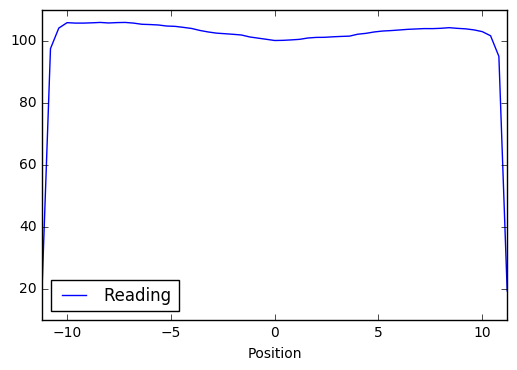

In [69]:
pre_X_df.plot()

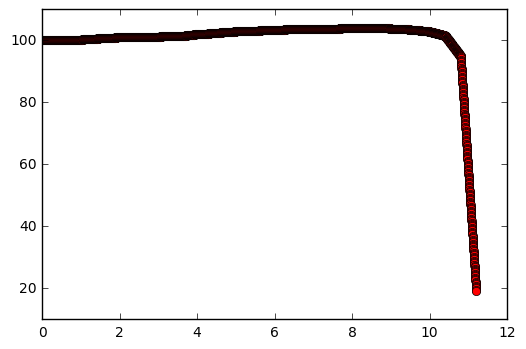

In [67]:
plt.plot(pre_X_df_interp[0:], marker='o', color='r')

In [57]:
temp_df = pre_X_df_interp[0:] - 50.0

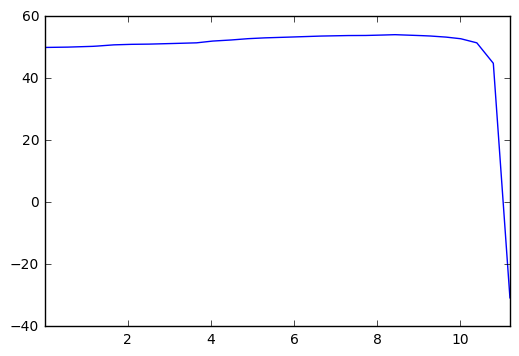

In [68]:
temp_df.plot()

In [66]:
D50_loc = temp_df[(temp_df >-1) & (temp_df < 1.0)].index.get_values()[1]
field_width = 2*D50_loc
print('The width of the field is {} cm'.format(field_width))

The width of the field is 22.07292729272927 cm


The Area Average symmetry is 0.7736776301944716 %


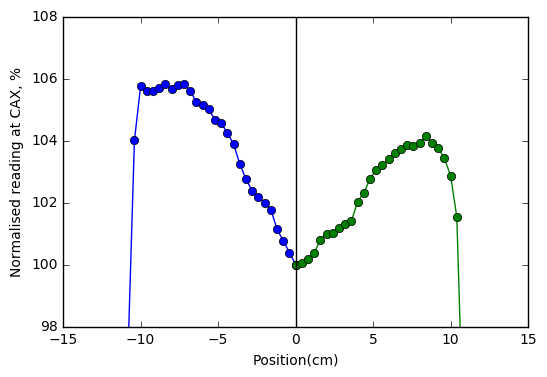

In [5]:
plt.plot(pre_X_df[:0], marker='o', color='b')
plt.plot(pre_X_df[0:], marker='o', color='g')
plt.axvline(x=0, color='k')
plt.ylim(0, 120)
plt.ylim(98, 108)
plt.title='pre_X_df'
plt.ylabel('Normalised reading at CAX, %')
plt.xlabel('Position(cm)')

area_sym_pre = 100.0*(pre_X_df[pre_X_df > 80.0][:0].sum()[0] -  pre_X_df[pre_X_df > 80.0][0:].sum()[0]) /  (pre_X_df[pre_X_df > 80.0][:0].sum()[0] + pre_X_df[pre_X_df > 80.0][0:].sum()[0]) 
print('The Area Average symmetry is {0} %'.format(area_sym_pre))

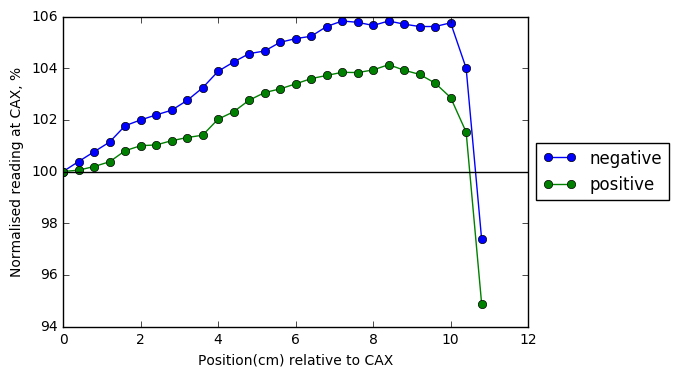

In [6]:
pre_X_df_negative = pre_X_df[pre_X_df > 80.0][:0]
pre_X_df_negative.index = pre_X_df_negative.index*-1   # make index positives

pre_X_df_positive_reversed =  pre_X_df[pre_X_df > 80.0][0:]
pre_X_df_positive_reversed = pre_X_df_positive_reversed.iloc[::-1]  # reverse the inde

plt.plot(pre_X_df_negative, label = 'negative', marker='o')
plt.plot(pre_X_df_positive_reversed, label= 'positive', marker='o')
plt.axhline(y=100, color='k') 
plt.ylabel('Normalised reading at CAX, %')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.xlabel('Position(cm) relative to CAX')

In [7]:
area_sym_pre = 100.0*(pre_X_df[pre_X_df > 80.0][:0].sum()[0] -  pre_X_df[pre_X_df > 80.0][0:].sum()[0]) /  (pre_X_df[pre_X_df > 80.0][:0].sum()[0] + pre_X_df[pre_X_df > 80.0][0:].sum()[0]) 
print('The Area Average symmetry is {0} %'.format(area_sym_pre))

point_difference_pre = pre_X_df_negative - pre_X_df_positive_reversed   
print('The mean point difference is {}'.format(point_difference_pre.mean()[0]))
print('The max point difference is {}'.format(point_difference_pre.abs().max()[0]))

The Area Average symmetry is 0.7736776301944716 %
The mean point difference is 1.5914646567529032
The max point difference is 2.892646160114083


## Plot X post data

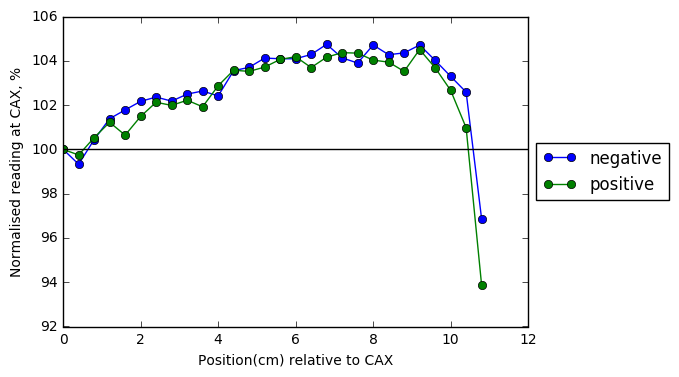

In [8]:
post_X_df_negative = post_X_df[post_X_df > 80.0][:0]
post_X_df_negative.index = post_X_df_negative.index*-1   # make index positives

post_X_df_positive_reversed =  post_X_df[post_X_df > 80.0][0:]
post_X_df_positive_reversed = post_X_df_positive_reversed.iloc[::-1]  # reverse the inde

plt.plot(post_X_df_negative, label = 'negative', marker='o')
plt.plot(post_X_df_positive_reversed, label= 'positive', marker='o')
plt.axhline(y=100, color='k') 
plt.ylabel('Normalised reading at CAX, %')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.xlabel('Position(cm) relative to CAX')
#plt.title('Post steering')

In [9]:
area_sym_post= 100.0*(post_X_df[post_X_df > 80.0][:0].sum()[0] -  post_X_df[post_X_df > 80.0][0:].sum()[0]) /  (post_X_df[post_X_df > 80.0][:0].sum()[0] + post_X_df[post_X_df > 80.0][0:].sum()[0]) 
print('The Area Average symmetry is {0} %'.format(area_sym_post))

point_difference_post = post_X_df_negative - post_X_df_positive_reversed   
print('The mean point difference is {}'.format(point_difference_post.mean()[0]))
print('The max point difference is {}'.format(point_difference_post.abs().max()[0]))

The Area Average symmetry is 0.19236151211027328 %
The mean point difference is 0.3947655398037081
The max point difference is 2.992366412213741


## Plot X pre and post data

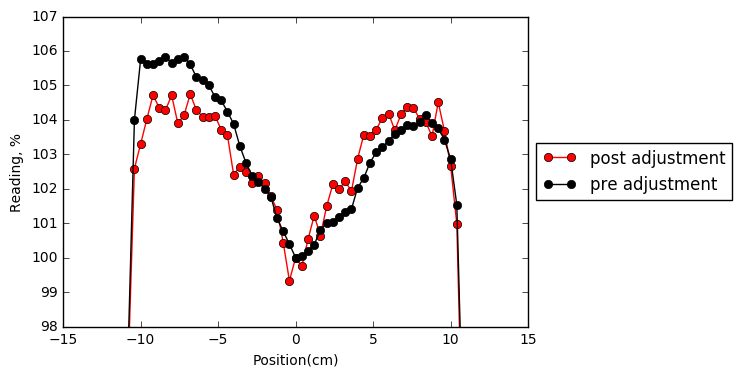

In [10]:
plt.plot(post_X_df, label='post adjustment', marker='o', color='r')
plt.plot(pre_X_df, label='pre adjustment', marker='o', color='k')
plt.ylim(98, 107)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

plt.ylabel('Reading, %')
plt.xlabel('Position(cm)')

(-10.4, 10.4)

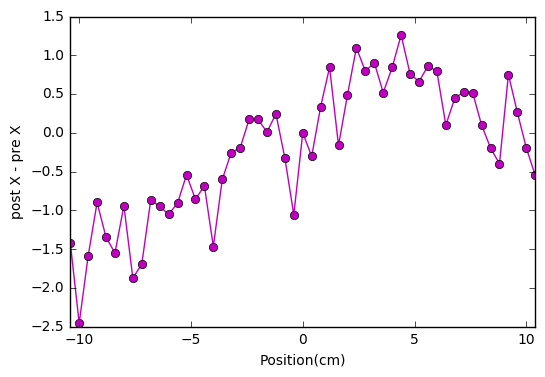

In [11]:
plt.plot(post_X_df - pre_X_df, marker='o', color='m')
plt.ylabel('post X - pre X')
plt.xlabel('Position(cm)')
plt.xlim(-10.4, 10.4)